Libraries for EDA and Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'''
Spam = 1
Not Spam = 0
'''

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Spam Email/phishing_email.csv')
df.head(10)

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
5,hpl nom may 31 2001 see attached file hplno 53...,0
6,9760 tried get fancy address came back forward...,0
7,hpl noms february 15 2000 see attached file hp...,0
8,fw pooling contract template original message ...,0
9,hpl nom march 28 2000 see attached file hplo 3...,0


Checking the Dimension of the Given Dataset

In [ ]:
df.shape

(82486, 2)

Checking Columns

In [ ]:
df.columns

Index(['text_combined', 'label'], dtype='object')

Checking the Balance of Spam and Ham Emails

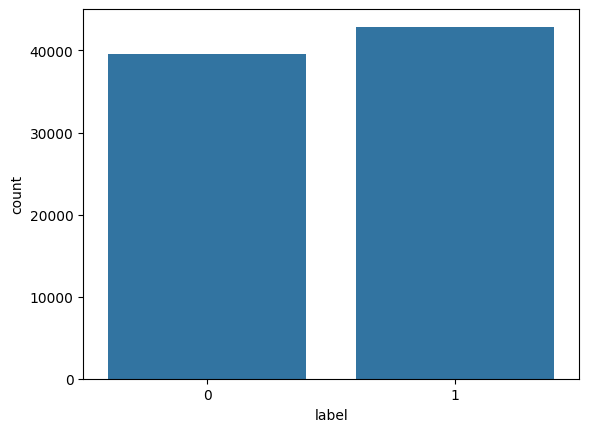

In [ ]:
sns.countplot(x='label', data=df)
plt.show()

Almost equal number of Spam and Ham

Removing Subject from the text and it is not necessary

In [ ]:
df['text_combined'] = df['text_combined'].str.replace('Subject', '')
df.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


Removing Punctuations

In [ ]:
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['text_combined']= df['text_combined'].apply(lambda x: remove_punctuations(x))
df.head(10)

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
5,hpl nom may 31 2001 see attached file hplno 53...,0
6,9760 tried get fancy address came back forward...,0
7,hpl noms february 15 2000 see attached file hp...,0
8,fw pooling contract template original message ...,0
9,hpl nom march 28 2000 see attached file hplo 3...,0


Using Inbuilt Library to remove Stop Words

In [ ]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():
		word = word.lower()

		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['text_combined'] = df['text_combined'].apply(lambda text: remove_stopwords(text))
df.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


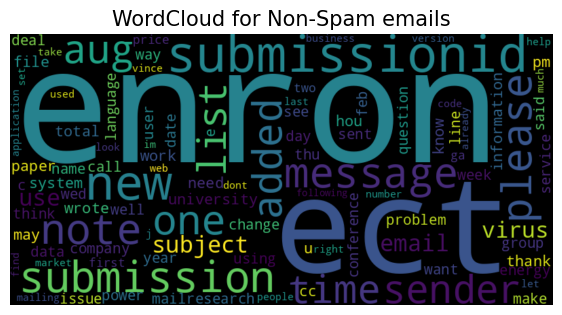

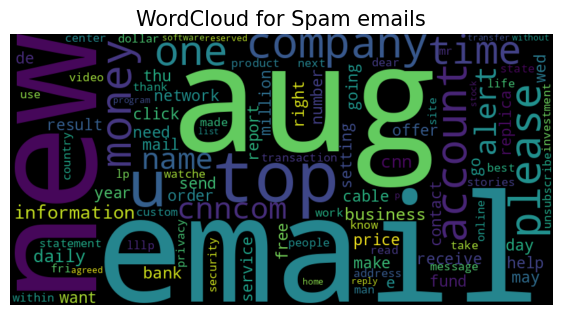

In [ ]:
def plot_word_cloud(data, typ):
	email_corpus = " ".join(data['text_combined'])

	plt.figure(figsize=(7, 7))

	wc = WordCloud(background_color='black',
				max_words=100,
				width=800,
				height=400,
				collocations=False).generate(email_corpus)

	plt.imshow(wc, interpolation='bilinear')
	plt.title(f'WordCloud for {typ} emails', fontsize=15)
	plt.axis('off')
	plt.show()

plot_word_cloud(df[df['label'] == 0], typ='Non-Spam')
plot_word_cloud(df[df['label'] == 1], typ='Spam')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(df['text_combined'],df['label'],test_size = 0.2,random_state = 42)

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100
train_sequences = pad_sequences(train_sequences,maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,output_dim=32, input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           17760800  
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17764513 (67.77 MB)
Trainable params: 17764513 (67.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),metrics = ['accuracy'],optimizer = 'adam')

In [ ]:
es = EarlyStopping(patience=3,monitor = 'val_accuracy',restore_best_weights = True)
lr = ReduceLROnPlateau(patience = 2,monitor = 'val_loss',factor = 0.5,verbose = 0)

In [ ]:
history = model.fit(train_sequences, train_Y,validation_data=(test_sequences, test_Y),epochs=20, batch_size=32,callbacks = [lr, es])

Epoch 1/20
2063/2063 [==============================] - 1253s 607ms/step - loss: 0.0320 - accuracy: 0.9918 - val_loss: 0.0770 - val_accuracy: 0.9789 - lr: 2.5000e-04
Epoch 2/20
2063/2063 [==============================] - 1246s 604ms/step - loss: 0.0208 - accuracy: 0.9953 - val_loss: 0.0830 - val_accuracy: 0.9819 - lr: 2.5000e-04
Epoch 3/20
1848/2063 [=========================>....] - ETA: 2:08 - loss: 0.0163 - accuracy: 0.9967

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'spam_classifier_model.joblib')
joblib.dump(tokenizer, 'tfidf_tokenizer.joblib')

In [ ]:
!pip install streamlit --quiet

In [ ]:
import streamlit as st
import joblib
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved model and tokenizer
model = joblib.load('spam_classifier_model.joblib')
tokenizer = joblib.load('tfidf_tokenizer.joblib')

# Define a function to preprocess the input text
def preprocess_text(text):
    # Remove punctuations and stop words (reuse your existing functions)
    # ...
    a = remove_punctuations(text)
    b = remove_stopwords(a)
    # Tokenize the text
    sequence = tokenizer.texts_to_sequences([b])
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')
    return padded_sequence

# Create the Streamlit app
st.title("Spam Email Classifier")

# Get user input
user_input = st.text_area("Enter email text:")

# Preprocess the input text
if user_input:
    processed_input = preprocess_text(user_input)

    # Make a prediction
    prediction = model.predict(processed_input)

    # Display the prediction
    if prediction > 0.5:
        st.write("This email is likely spam.")
    else:
        st.write("This email is likely not spam.")